Map expansion tutorial


/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python3.8/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([
/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python3.8/site-packages/descartes/patch.py:64: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  [asarray(r)[:, :2] for r in t.interiors])


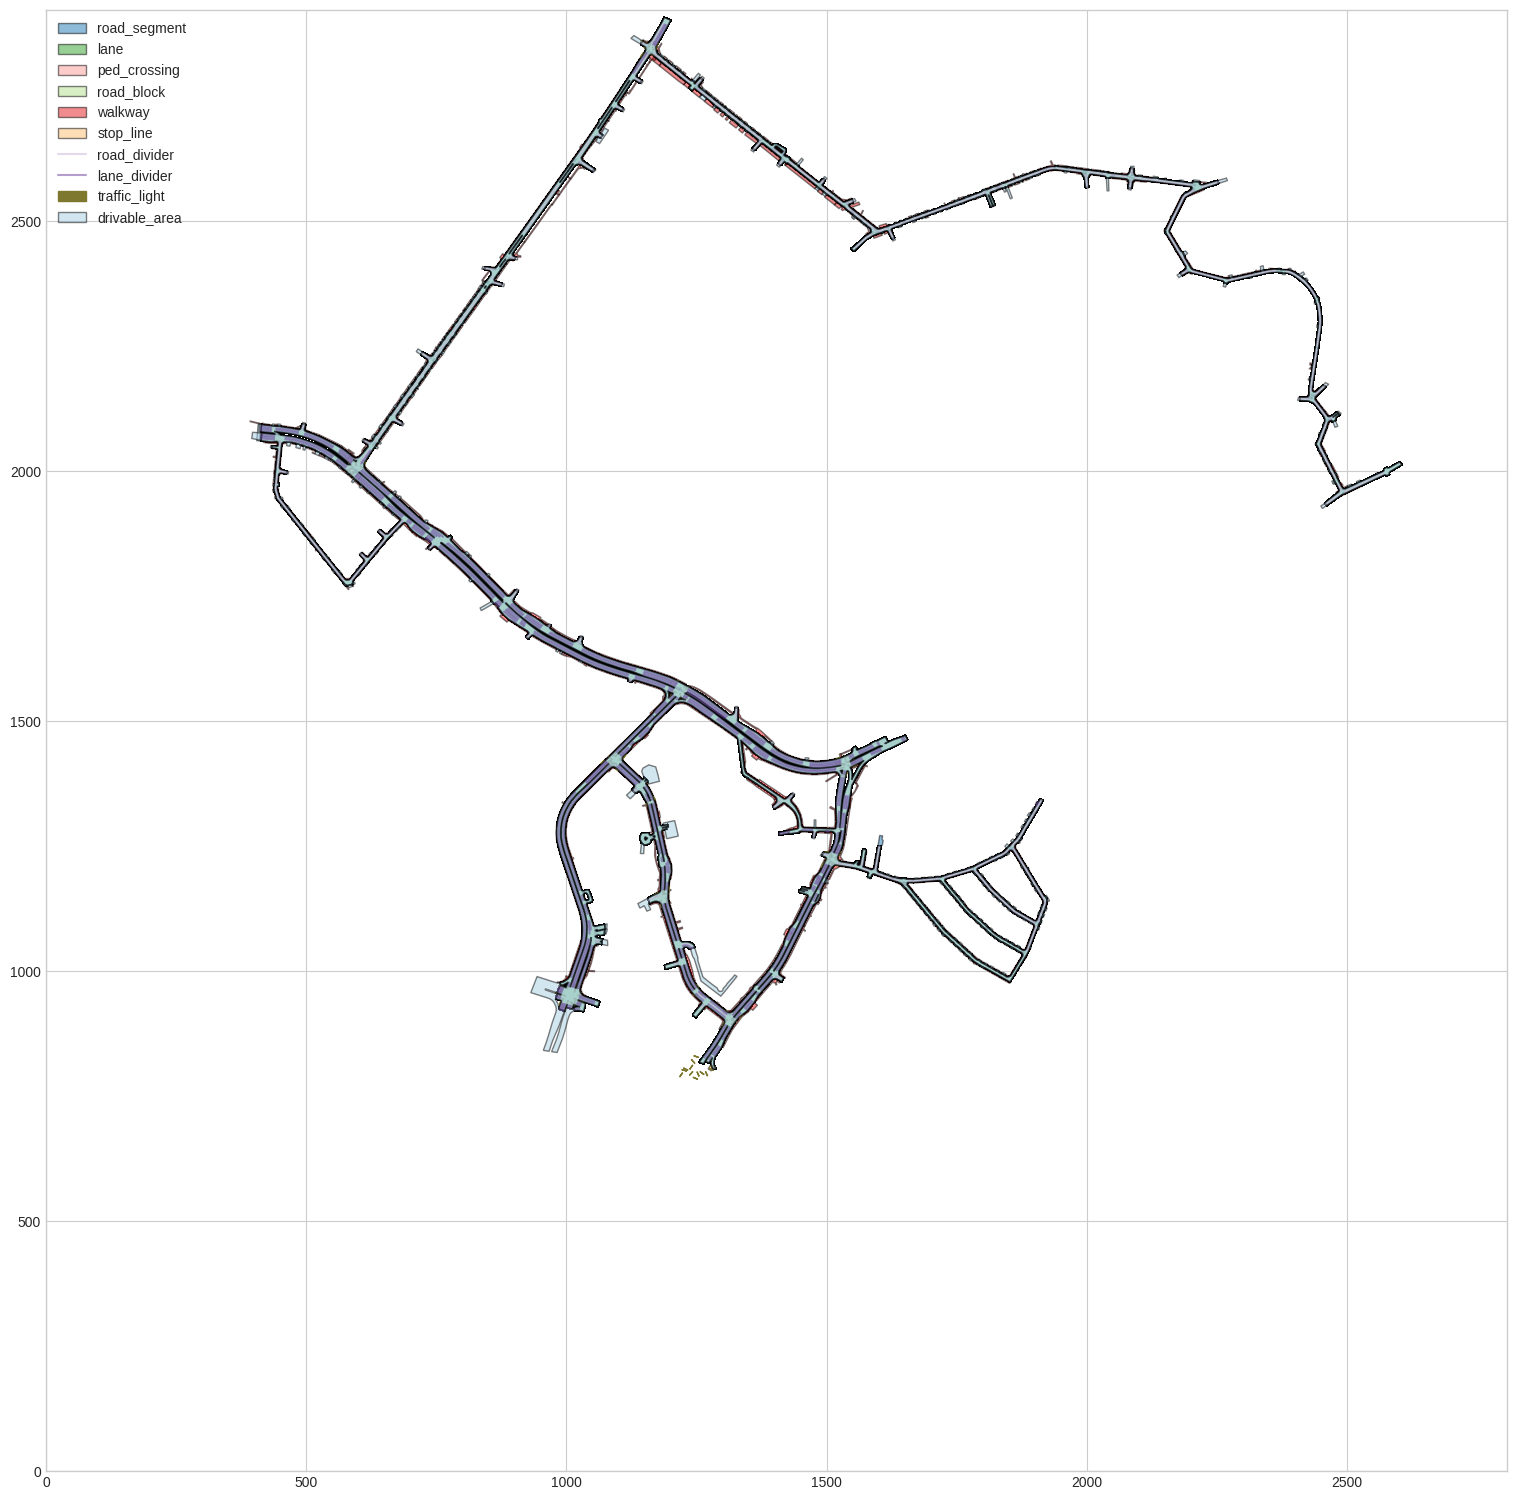

In [1]:
import matplotlib.pyplot as plt
import tqdm
import numpy as np
import os

from nuscenes.map_expansion.map_api import NuScenesMap
from nuscenes.map_expansion import arcline_path_utils
from nuscenes.map_expansion.bitmap import BitMap

nusc_map = NuScenesMap(dataroot='/home/qichen/projects/MapTR-main/data/nuscenes', map_name='singapore-hollandvillage')
nusc_map.render_layers(nusc_map.non_geometric_layers, figsize=1)



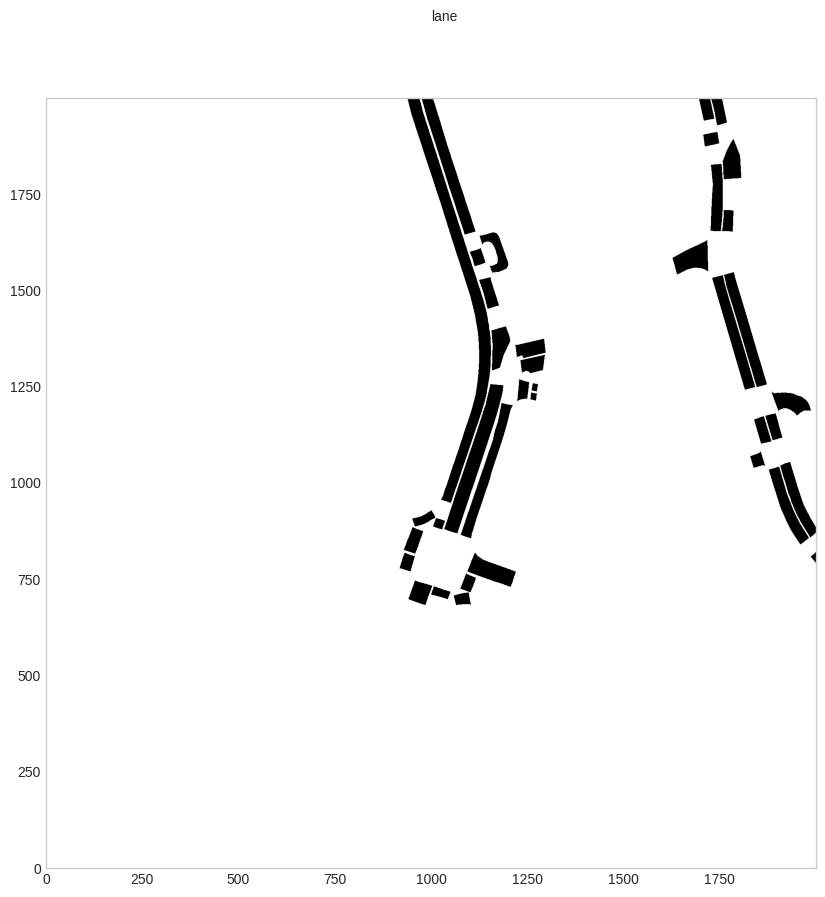

In [30]:
patch_box = (1000, 1000, 500, 500)
patch_angle = 0
# Default orientation where North is up
# layer_names = ['road_segment', 'lane']
layer_names = ['lane']
# layer_names = ['road_divider','road_segment', 'lane', 'ped_crossing', 'walkway', 'stop_line', 'carpark_area']
canvas_size = (2000, 2000)
# map_mask = nusc_map.get_map_mask(patch_box, patch_angle, layer_names, canvas_size)
# map_mask[0]

figsize = (30, 10)
fig, ax = nusc_map.render_map_mask(patch_box, patch_angle, layer_names, canvas_size, figsize=figsize, n_row=1)



In [1]:
import sys
 
if '/home/qichen/projects/HDMapNet-fusion' not in sys.path:
    sys.path.append('/home/qichen/projects/HDMapNet-fusion') 
print(sys.path)

from data.vector_map import VectorizedLocalMap

from data.dataset import *

class mbmapdatatest(HDMapNetSemanticDataset):
    def __init__(self, version, dataroot, data_conf, is_train):
        super(mbmapdatatest, self).__init__(version, dataroot, data_conf, is_train)
        self.vector_map = mbmap(dataroot, patch_size=self.patch_size, canvas_size=self.canvas_size)

class mbmap(VectorizedLocalMap):
    def __init__(self):
        super(mbmap, self).__init__()
        '''
        Args:
            fixed_num = -1 : no fixed num
        '''
        super().__init__()
        self.MAPS = ['boston-seaport', 'singapore-hollandvillage',
                     'singapore-onenorth', 'singapore-queenstown', 'singapore-hollandvillage-mbfake']
        
def semantic_dataset(version, dataroot, data_conf, bsz, nworkers):
    train_dataset = mbmapdatatest(version='v1.0-trainval', dataroot='/home/qichen/projects/Nuscene-full/', data_conf=data_conf, is_train=True)
    val_dataset = mbmapdatatest(version, dataroot, data_conf, is_train=False,)

    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=bsz, shuffle=True, num_workers=nworkers, drop_last=True)
    val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=bsz, shuffle=False, num_workers=nworkers)
    return train_loader, val_loader

if __name__ == '__main__':
    data_conf = {
        'image_size': (900, 1600),
        'xbound': [-30.0, 30.0, 0.15],
        'ybound': [-15.0, 15.0, 0.15],
        'thickness': 5,
        'angle_class': 36,
    }

    dataset = mbmapdatatest(version='v1.0-trainval', dataroot='/home/qichen/projects/Nuscene-full/', data_conf=data_conf, is_train=False)
    for idx in range(len(dataset)):
        imgs, trans, rots, intrins, post_trans, post_rots, lidar_data, lidar_mask, car_trans, yaw_pitch_roll, semantic_masks, instance_masks, direction_mask = dataset[idx]


['/home/qichen/projects/HDMapNet-fusion/maptest', '/home/qichen/anaconda3/bin', '/home/qichen/anaconda3/condabin', '/usr/local/sbin', '/usr/local/bin', '/usr/sbin', '/usr/bin', '/sbin', '/bin', '/usr/games', '/usr/local/games', '/snap/bin', '/usr/local/cuda/bin', '/usr/bin/python3', '/home/qichen/projects/MapTR-main', '/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python38.zip', '/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python3.8', '/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python3.8/lib-dynload', '', '/home/qichen/anaconda3/envs/hdmapnet_py38/lib/python3.8/site-packages', '/home/qichen/projects/HDMapNet-fusion']


TypeError: __init__() got an unexpected keyword argument 'patch_size'